# Load dataset

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dfConfirmed = pd.read_csv("time_series_covid19_confirmed_global.csv")
dfDeath = pd.read_csv("time_series_covid19_deaths_global.csv")
dfRecovered = pd.read_csv("time_series_covid19_recovered_global.csv")

#rename columns
dfConfirmed.rename(columns={'Province/State': 'province', 'Country/Region': 'country'}, inplace=True)
dfDeath.rename(columns={'Province/State': 'province', 'Country/Region': 'country'}, inplace=True)
dfRecovered.rename(columns={'Province/State': 'province', 'Country/Region': 'country'}, inplace=True)

data = [dfConfirmed,dfDeath,dfRecovered]

# Data visualization on provinces

##### Plot confirmed, recovered and deaths per regios

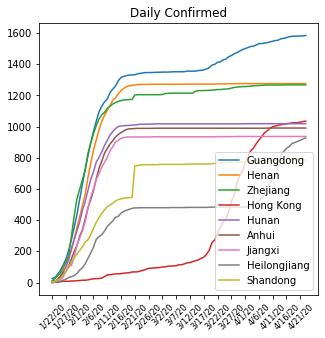

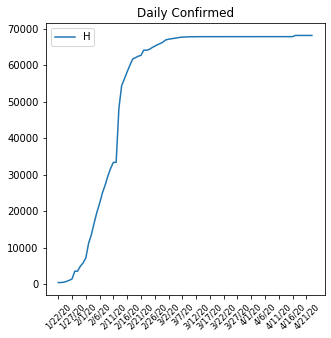

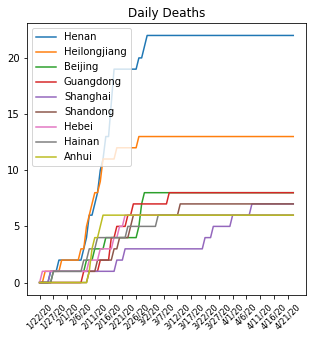

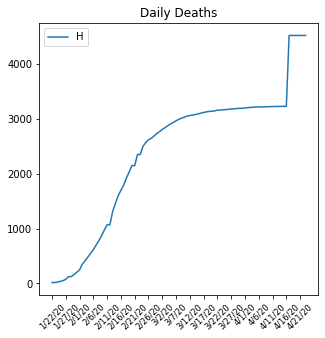

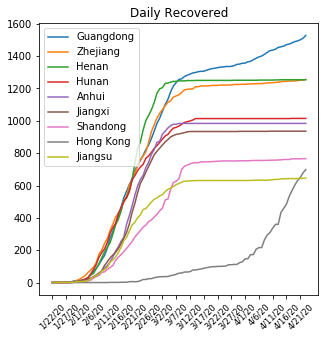

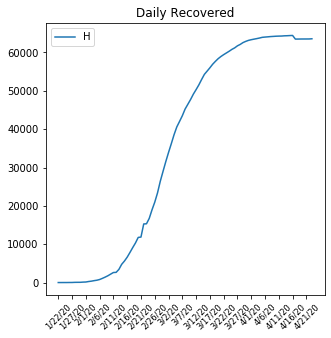

In [8]:
def selectCountry(countryName,df):
    df = df.loc[df['country'] == countryName]
    df = df.drop(['Lat','Long','country'], axis=1)
    df = df.set_index('province').T
    sortedProvinces = df.max().sort_values(ascending=False).index
    return sortedProvinces,df

def plot_regions(df,plotted_columns,title): 
    fig,ax = plt.subplots(figsize=[5,5])
    
    ind = np.arange(0,len(df),5)
    indNames = [df.index[i] for i in range(len(df)) if i %5 ==0]

    lineObjects = ax.plot(df[plotted_columns]);
    plt.xticks(ind,indNames, rotation=45,fontsize='small')
    plt.legend(iter(lineObjects), (plotted_columns))
    plt.title(title)
    plt.show();
    

datasets = [dfConfirmed, dfDeath, dfRecovered]
countries = ['China']
provinces,dfs = [],[]
titles = ['Daily Confirmed','Daily Deaths', 'Daily Recovered'] 

for country in countries:
    for dataset in datasets:       
        provinces.append(selectCountry(country, dataset)[0])
        dfs.append(selectCountry(country, dataset)[1])

for i in range(len(dfs)):
    plot_regions(dfs[i],provinces[i][1:10],titles[i])
    plot_regions(dfs[i],provinces[i][0],titles[i])

# Experiments

##### Drop lat, long and province columns

In [15]:
for i in range(len(data)): 
    data[i] = data[i].drop(['Lat','Long'],axis=1)
    

##### Check countries with top confirmed cases in last day

In [ ]:
lastCol = dfConfirmed.iloc[:,[1,-1]]
sorted_last = last.sort_values(by=last.columns[1],ascending=False)
sorted_last = sorted_last.iloc[:30,:]
# topTen = sorted_last.country.tolist()
topTwenty = sorted_last.country.tolist()
# topTwenty
# nonEurope = ['US', 'Iran', 'China',"Brazil", "India", "Canada", "Peru"]
# topEurope = [topTwenty[i] for i in topTwenty and i not in nonEurope]

### Take only european countries

In [3]:
europe = pd.read_csv("Countries-Europe.csv")
europe = europe.name.tolist()
europe = list(set([i for i in dfConfirmed.country if i in europe])) #get european countries present in dataset

#define european dataframes
EuConfirmed = dfConfirmed[dfConfirmed.country.isin(europe)]
EuRecovered = dfRecovered[dfRecovered.country.isin(europe)]
EuDeath = dfDeath[dfDeath.country.isin(europe)]

#store dataframes in list
EU = [EuConfirmed,EuRecovered,EuDeath]
EUNames = ['EuConfirmed', 'EuRecovered','EuDeath']

##### EXPERIMENT: Check for european provinces only don't need to load anymore

In [8]:
# #Sort out non european provinces
# europeans = [i for i in dfConfirmed.country if i in europe]
# CountsEU={}
# for item in europeans:
#     CountsEU[item]=europeans.count(item)
    
# multipleEU = list(dict((k, v) for k, v in CountsEU.items() if v > 1).keys())

# EuConfirmed = EuConfirmed[EuConfirmed.country.isin(CountsEU)]

# multipleProvinces = multipleProvinces.sort_values(by='country')
# multipleProvinces = multipleProvinces[multipleProvinces.province.isnull()]

Conclusion: if provinces == NaN, country == in europe

##### Filter out non european provinces

In [9]:
EUSorted = EU[0].sort_values(by=['4/23/20'],ascending=False) #select top 5 based on latest measurements

#Define top 5 countries with highest rates and others
EuHigh = list(EUSorted.country.iloc[:5])
EuLow = (EUSorted.country.iloc[5:])
dfHigh,dfLow = [],[]
for dataset in EU: 
    dfHigh.append(dataset[dataset.country.isin(EuHigh)])
    dfLow.append(dataset[dataset.country.isin(EuLow)])

##### Plot top 5 countries and rest separately

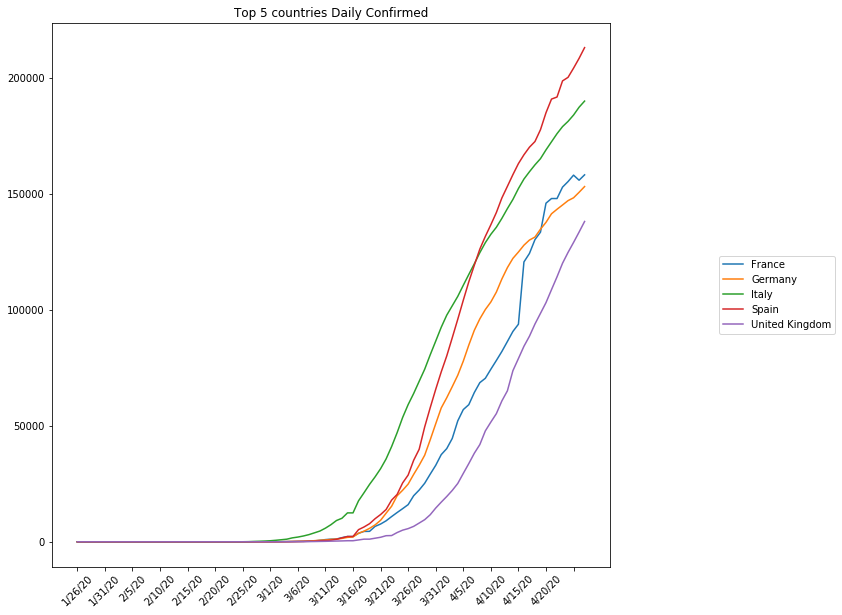

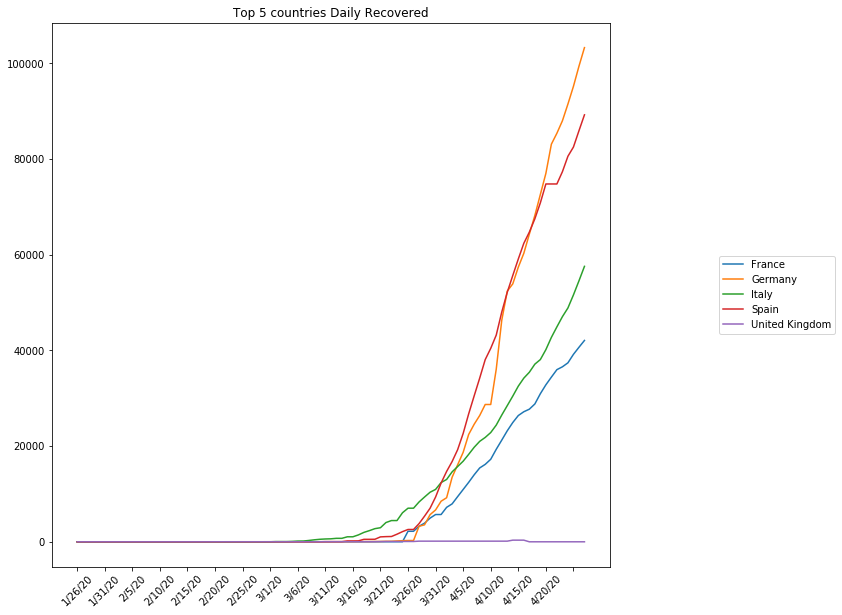

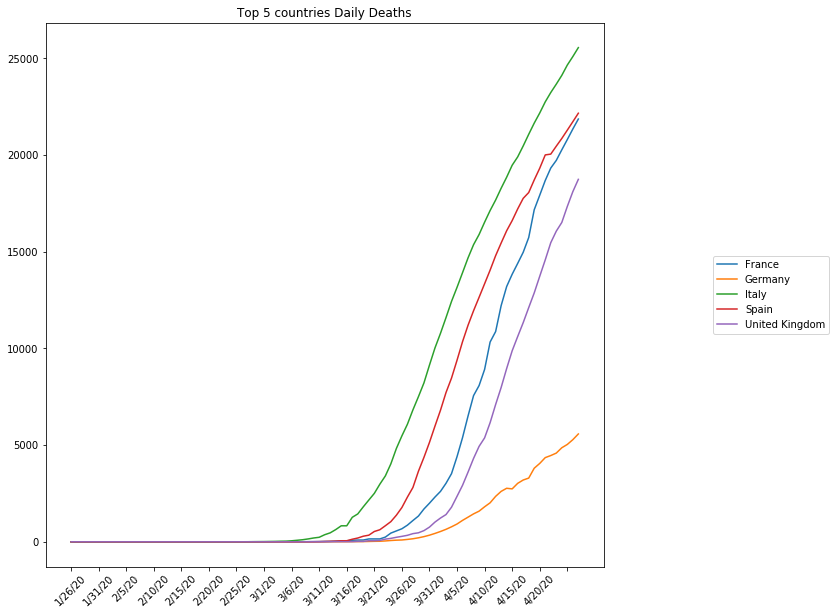

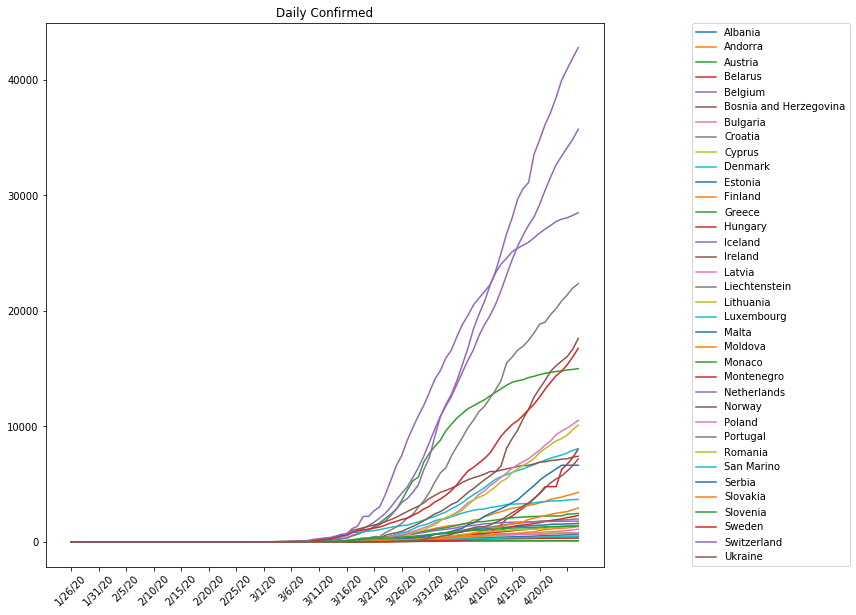

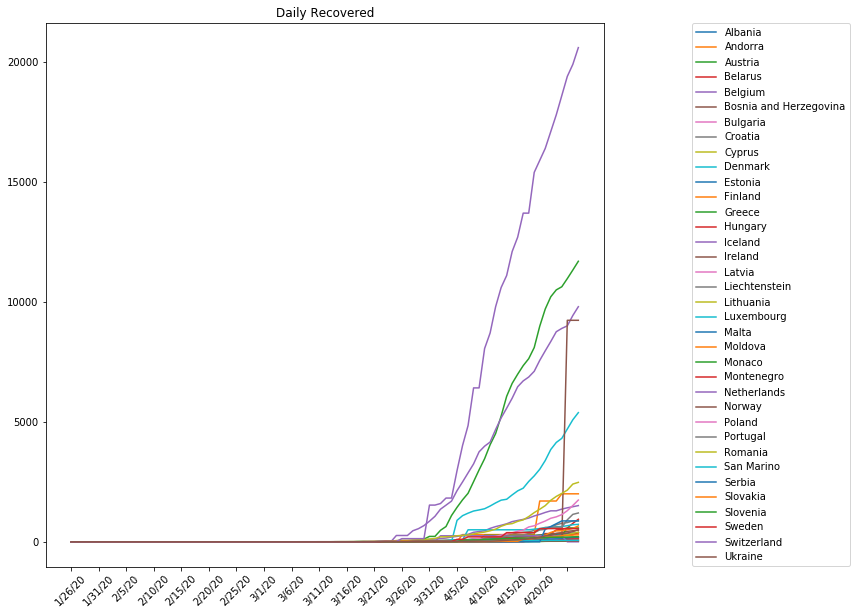

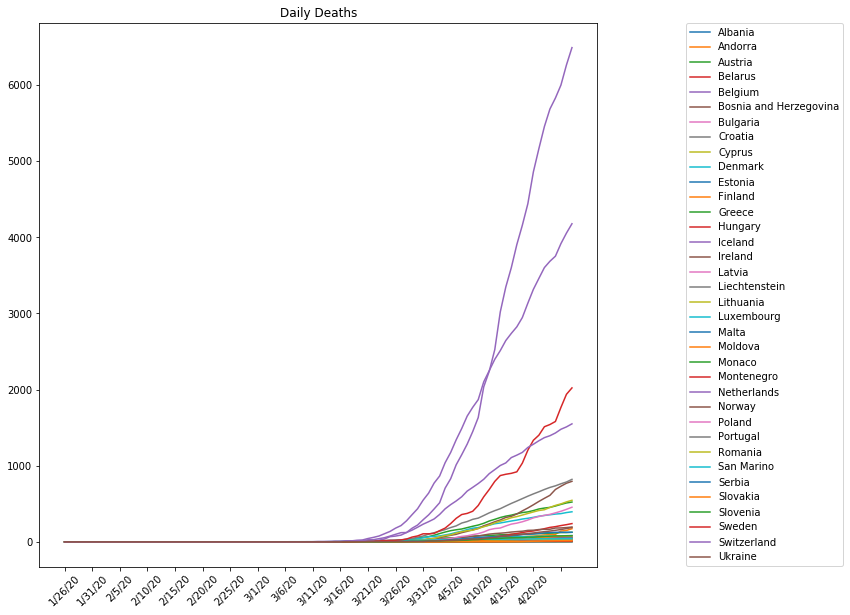

In [211]:
titlesTop = ['Top 5 countries Daily Confirmed', 'Top 5 countries Daily Recovered', 'Top 5 countries Daily Deaths']
titles = ['Daily Confirmed', 'Daily Recovered', 'Daily Deaths']

indexData = EU[0].iloc[:,1:].shape[1]


def plotfigs(dfs,titles):
    i = 0
    for dataset in dfs:
        fix,ax = plt.subplots(figsize=[10,10])
        for index,row in dataset.iterrows():    
            label = row.country
            data = row[1:]

            ind = np.arange(0,indexData,5)
            indNames = [row.index[i] for i in range(1,indexData) if i % 5 == 0]

            plt.plot(data,label=label)   
            plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
            plt.xticks(ind,indNames,rotation=45)
            plt.title(titles[i])
            lgd = ax.legend(loc=10, bbox_to_anchor=(1.3,0.5))
            plt.savefig(titles[i]+'.png',bbox_extra_artists=(lgd,), bbox_inches='tight')
        i+=1
        
plotfigs(dfHigh,titlesTop)
plotfigs(dfLow,titles)

In [18]:
europe = pd.read_csv("Countries-Europe.csv")
europe = europe.name.tolist()
europeans = list(set([i for i in dfConfirmed.country if i in europe]))

EuConfirmed = dfConfirmed[dfConfirmed.country.isin(europeans)]
EuRecovered = dfRecovered[dfRecovered.country.isin(europeans)]
EuDeath = dfDeath[dfDeath.country.isin(europeans)]


##### Plot confirmed per country

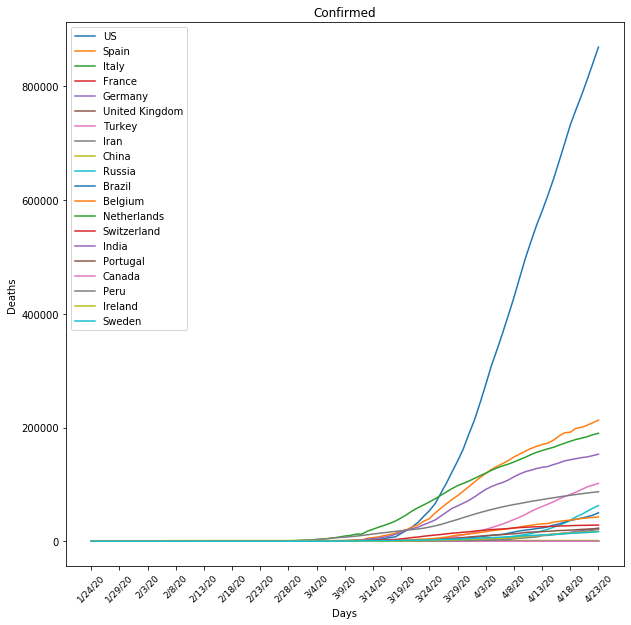

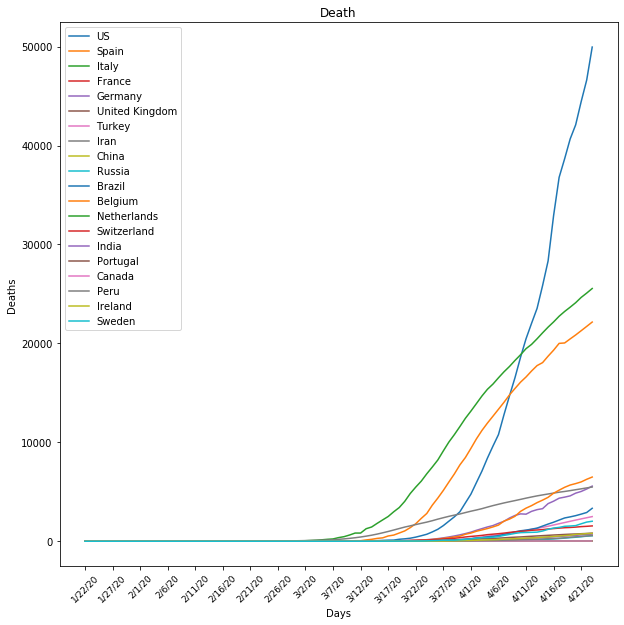

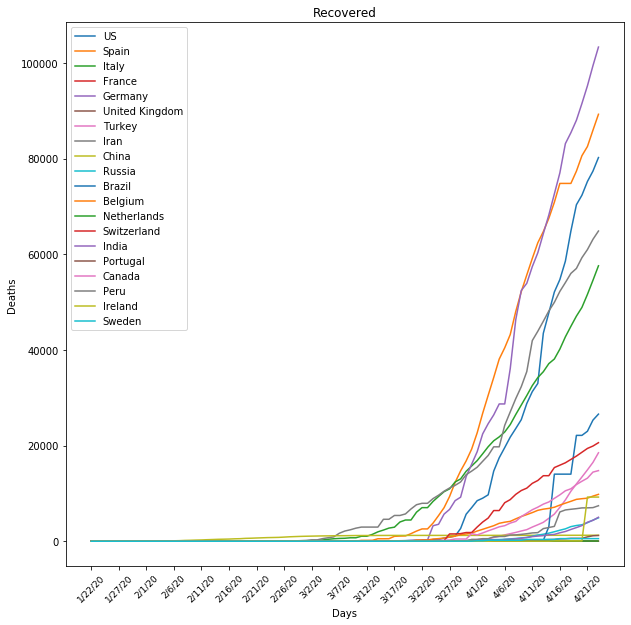

In [82]:
def plot_days(df,countryname,title):
    country = df[df.country == countryname]
    country = country.drop(country.columns[0:4], axis=1) #only keep days
    if len(country) > 1:
        country.drop(country.head(len(country)-1).index,inplace=True) #select only one country
    country = country.T
    
    ind = np.arange(0,len(country),5)
    indNames = [country.index[i] for i in range(len(country)) if i %5 == 0]
    
    plt.plot(country.index,country,label=countryname)
    plt.xticks(ind,indNames,rotation=45,fontsize=9);
    plt.xlabel("Days")
    plt.ylabel("Deaths")
    plt.title(title)
    plt.legend()
    plt.savefig(title+'.png')
    return country
    
# countries = ['Netherlands','Austria','China']
datasets = [dfConfirmed, dfDeath, dfRecovered]
titles = ['Confirmed', 'Death', 'Recovered']
countries = topTen
europeans = [topTen[i] for i in topTen]


for i in range(len(datasets)): 
    fig,ax=plt.subplots(figsize=[10,10])
    for k in countries: 
         plot_days(datasets[i],k,titles[i]);
